**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMAI/Assignment2/q_datasets/fashion_mnist/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/SMAI/Assignment2/q_datasets/fashion_mnist
/content/drive/MyDrive/SMAI/Assignment2/q_datasets/fashion_mnist
data.csv		 t10k-images-idx3-ubyte   train-labels-idx1-ubyte
fashion-mnist_test.csv	 t10k-labels-idx1-ubyte
fashion-mnist_train.csv  train-images-idx3-ubyte


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.cluster import homogeneity_score
from sklearn.manifold import TSNE
%matplotlib inline

In [3]:
df_data_org = pd.read_csv('fashion-mnist_train.csv', na_values=np.NaN)
print(df_data_org.shape)
display(df_data_org.head())
display(df_data_org.info())
display(df_data_org.describe())
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Xtrain_org = df_data_org.drop(['label'], axis=1).to_numpy(dtype=np.float32)
Ytrain_org = df_data_org['label'].to_numpy(dtype=int)
print(Xtrain_org.shape, Xtrain_org.dtype)
print(Ytrain_org.shape, Ytrain_org.dtype)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

Series([], dtype: int64)
(60000, 784) float32
(60000,) int64


In [4]:
df_data_org = pd.read_csv('fashion-mnist_test.csv', na_values=np.NaN)
print(df_data_org.shape)
display(df_data_org.head())
display(df_data_org.info())
display(df_data_org.describe())
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Xtest_org = df_data_org.drop(['label'], axis=1).to_numpy(dtype=np.float32)
Ytest_org = df_data_org['label'].to_numpy(dtype=int)
print(Xtest_org.shape,Xtest_org.dtype)
print(Ytest_org.shape,Ytest_org.dtype)

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,14.363500,33.625600,46.371400,52.705500,50.959500,50.722900,53.773300,51.668100,40.957300,26.241800,10.37650,4.142300,2.021100,1.125100,0.771200,0.452800,0.245900,0.067500,0.033900,0.008300,0.032400,0.125500,0.302700,0.720100,1.977300,7.117700,17.217500,31.759600,53.424700,81.266500,...,93.047300,90.600000,78.859100,61.960100,45.922200,44.413500,47.56900,38.041800,21.628900,8.533300,3.227400,0.46090,0.031600,0.215,0.888200,4.366100,12.836900,20.695900,20.847100,16.933400,22.210700,30.836100,42.304200,52.398200,52.929500,46.106400,42.722100,45.515100,50.258400,46.109200,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,37.911701,58.728202,66.622009,69.652762,68.646661,67.973606,69.853856,68.372231,63.562213,51.962122,32.75711,20.554695,14.091122,10.783361,9.136432,7.110811,5.773246,2.496271,1.938898,0.388904,1.288144,4.151876,5.003037,9.590733,15.750632,29.975719,47.858968,65.367595,82.516117,96.591129,...,101.315512,100.237952,95.316054,88.969202,78.893333,77.560636,83.26921,73.827424,54.836583,36.256582,22.229015,6.85644,1.303139,4.557,9.090213,20.445965,37.378604,48.704573,47.924505,42.155582,48.651452,55.721562,63.108566,69.561834,70.317282,67.675636,66.805592,67.386268,69.018887,66.423861,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.00

Series([], dtype: int64)
(10000, 784) float32
(10000,) int64


In [10]:
entire_X = np.concatenate((Xtrain_org, Xtest_org))
entire_Y = np.concatenate((Ytrain_org, Ytest_org))

print(entire_X.shape, entire_Y.shape)

Xtrain_org, Xtest_org, Ytrain_org, Ytest_org = train_test_split(entire_X, entire_Y, test_size=0.30,random_state=1)

print(Xtrain_org.shape, Ytrain_org.shape)
print(Xtest_org.shape, Ytest_org.shape)

(70000, 784) (70000,)
(49000, 784) (49000,)
(21000, 784) (21000,)


MyKmeans class includes all the functions for distance calculation and centroids initialization including KMeans++

In [21]:
#implement Kmeans from scratch
class MyKmeans(object):
    def __init__(self, k=10, init_centers='forgy', max_itrs=100, dist='l2', tol=1):
        self.K = k 
        self.max_itrs = max_itrs
        self.init_centers = init_centers
        self.tolerance = tol
        self.centroids = None
        self.dist_metric = dist

    def fit(self,data):
        if self.init_centers == 'forgy':
            self.centroids = self.forgy_init(data)
        elif self.init_centers == 'partition':
            self.centroids = self.random_partition(data)
        elif self.init_centers == 'kmpp':
            self.centroids = self.kmeans_plus_plus(data)
        else:
            print("Wrong method")
            return None
            # self.centroids = data[:self.K]
        # print('centriods shape',self.centroids.shape)
        for i in range(self.max_itrs):
            # print('itr',i)
            self.cluster_set = {}
            for i in range(self.K):
                self.cluster_set[i] = []
            distances = None
            if self.dist_metric == 'l1':
                distances = self.manhattan_distance(data)
            elif self.dist_metric == 'l2':
                distances = self.euclid_distance(data,self.centroids)
            # print(distances.shape)
            pred_clusters = np.argmin(distances,axis=1)
            # print('pred_clusters',pred_clusters.shape)
            for c in range(self.K):
                self.cluster_set[c] = data[np.where(pred_clusters==c)]
            # print('distances shape',distances.shape)
            prev_centroids = self.centroids.copy()
            # inc = self.init_centers
            for cluster_no in self.cluster_set:
                self.centroids[cluster_no] = np.mean(self.cluster_set[cluster_no],axis=0)
            
            optimized = True
            for c in range(self.K):
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                change = np.sum(np.abs(current_centroid-original_centroid))
                if change > self.tolerance:
                    optimized = False
                    break
            if optimized:
                break
        # for c in self.classifications:
        #     print(c, len(self.classifications[c]))  
        return self

    def euclid_distance(self, X1, X2):
        all_dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]
        return all_dists
    
    def forgy_init(self, X):
        return np.array(X[np.random.choice(range(X.shape[0]), replace = False, size = self.K), :])

    def random_partition(self, X):
        indices = np.random.choice(range(0, self.K), replace=True, size=X.shape[0])
        init_centroids = np.zeros((self.K,X.shape[1]))
        for c in range(self.K):
            init_centroids[c] = np.mean(X[np.where(indices==c)],axis=0)        
        return init_centroids

    def kmeans_plus_plus(self,X):
        centers = []
        X = np.array(X)
        initial_index = np.random.choice(range(X.shape[0]))
        centers.append(X[initial_index, :].tolist())
        # print('center',len(centers),len(centers[0]))
        for i in range(self.K - 1):
            distance = self.euclid_distance(X, np.array(centers))  
            # print('distance',distance.shape)          
            if i == 0:
                pdf = np.abs(distance/np.sum(distance))
                # print('pdf1',pdf.shape)
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
            else:
                dist_min = np.min(distance, axis = 1)
                pdf = np.abs(dist_min/np.sum(dist_min))
                # print('pdf2',pdf.shape)
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf)]
                index_max = np.argmax(dist_min, axis = 0)
                centroid_new = X[index_max, :]
            centers.append(centroid_new.tolist())
        return np.array(centers)

    def manhattan_distance(self, X):
        mdists = np.zeros((self.K,X.shape[0]))
        for c in range(len(self.centroids)):
            mdists[c] = np.sum(np.abs(X - self.centroids[c]),axis=1)
        return mdists.T
                
    def predict(self,data):
        distances = []
        if self.dist_metric == 'l1':
            distances = self.manhattan_distance(data)
        elif self.dist_metric == 'l2':
            distances = self.euclid_distance(data,self.centroids)
        predictions = np.argmin(distances, axis=1)
        return np.array(predictions)
  

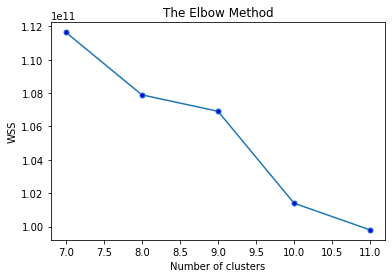

In [16]:
#implement elbow method from scratch
X_sub = Xtrain_org
# K = 
def elbow():
  sse = []
  for k in range(7,12):
    kmeans = MyKmeans(k,'forgy',100,'l2').fit(X_sub)
    centroids = kmeans.centroids
    pred_clusters = kmeans.predict(X_sub)
    curr_sse = 0

    for i in range(len(X_sub)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += np.sum((X_sub[i] - curr_center) ** 2)
      
    sse.append(curr_sse)

  return sse

wss = elbow()
plt.plot(range(7,12), wss, markersize=5, marker='o',markerfacecolor='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

By observing the Elbow graph, we choose number of clusters = 10


Kmeans with 10 clusters, forgy initialization and L2 distance metric

In [29]:
myk0 = MyKmeans(10,'forgy',100,'l2').fit(Xtrain_org)
myres0 = myk.predict(Xtrain_org)
print(myres0.shape,np.unique(myres))
print("Train homogenity score:")
myscore0 = homogeneity_score(Ytrain_org,myres0)
print(myscore0)
testres0 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest0 = homogeneity_score(Ytest_org, testres0)
print(mytest0)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.5027118811008883
Test homogenity score:
0.5012491742597607


Kmeans with 10 clusters, forgy initialization and L1 distance metric

In [19]:
myk = MyKmeans(10,'forgy',100,'l1').fit(Xtrain_org)
myres = myk.predict(Xtrain_org)
print(myres.shape,np.unique(myres))
print("Train homogenity score:")
myscore = homogeneity_score(Ytrain_org,myres)
print(myscore)
testres = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest = homogeneity_score(Ytest_org, testres)
print(mytest)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.48913445650740245
Test homogenity score:
0.4877053934720308


Kmeans with 10 clusters, random partition initialization and L2 distance metric

In [22]:
myk = MyKmeans(10,'partition',100,'l2').fit(Xtrain_org)
myres = myk.predict(Xtrain_org)
print(myres.shape,np.unique(myres))
print("Train homogenity score:")
myscore = homogeneity_score(Ytrain_org,myres)
print(myscore)
testres = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest = homogeneity_score(Ytest_org, testres)
print(mytest)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.5046181870992602
Test homogenity score:
0.5012394021089841


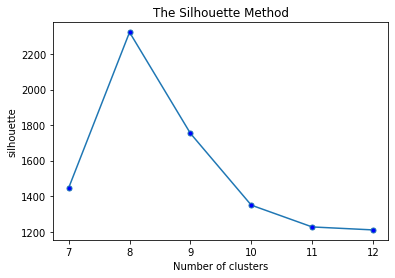

In [24]:
def euclid_distance(test_X, X2):
        all_dists = -2 * np.dot(test_X, X2.T) + np.sum(X2**2, axis=1) + np.sum(test_X**2, axis=1)[:, np.newaxis]
        return all_dists

def silhouette(X):
    Sk_list = []
    for k in range(7,13):
        kmeans = MyKmeans(k,'forgy',100,'l1').fit(X)
        centroids = kmeans.centroids
        # pred_clusters = kmeans.predict(X)
        centroids = kmeans.centroids
        clusters = kmeans.cluster_set
        center_dists = euclid_distance(centroids,centroids)
        # print('center_dists',center_dists.shape)
        tot_S = []
        for c in range(k):
            cur_cdists = euclid_distance(clusters[c],clusters[c])
            # print('cur_cdists',cur_cdists.shape)
            a = np.sum(cur_cdists,axis=1) / (len(clusters[c])-1)
            nearest_center = np.argmin(np.concatenate((center_dists[c,:c],center_dists[c,c+1:])))
            # print('nearest',len(clusters[nearest_center]))
            nearest_cdists = euclid_distance(clusters[c],clusters[nearest_center])
            # print('nearest_cdists',nearest_cdists.shape)
            b = np.sum(nearest_cdists,axis=1) / (len(clusters[nearest_center]))
            s = None
            if len(clusters[nearest_center]) > 1:
                s = (b - a) / np.max(np.stack((a,b),axis=0),axis=0)
            else:
                s = np.array([0])
            # tot_S = s.sum() / len(s)
            tot_S.append(s.sum())
        Sk_list.append(np.mean(tot_S))
    return Sk_list

sil = silhouette(Xtrain_org)
plt.plot(range(7,13), sil, markersize=5, marker='o',markerfacecolor='blue')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()
    



Kmeans with 8 clusters (obtained from Silhoutte), forgy initialization and L2 distance metric

In [26]:
myk1 = MyKmeans(8,'forgy',100,'l2').fit(Xtrain_org)
myres1 = myk1.predict(Xtrain_org)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7]
Train homogenity score:
0.4790229876434351
Test homogenity score:
0.47691029908245414


Visualizing train set clusters created by our Kmeans

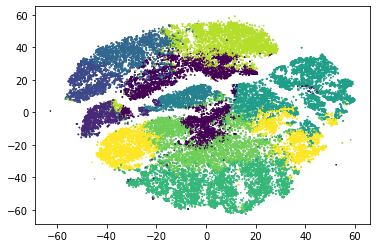

In [31]:
tsne = TSNE(n_components=2)
train_test_2D = tsne.fit_transform(Xtrain_org)
plt.scatter(train_test_2D[:,0], train_test_2D[:,1], c = myres0, s = 0.5)

In [32]:
from sklearn.cluster import KMeans

# 10 clusters

kmeans = KMeans(n_clusters=10, random_state=0,  init='random', max_iter=1000).fit(Xtrain_org)

res1 = kmeans.predict(Xtrain_org)
hscore = homogeneity_score(Ytrain_org,res1)

print('Training homogenity score:',hscore)

res2 = kmeans.predict(Xtest_org)
hscore = homogeneity_score(Ytest_org,res2)

print('Testing homogenity score:',hscore)

Training homogenity score: 0.5008850240884151
Testing homogenity score: 0.49974891711404645


In [34]:
# 8 clusters

kmeans = KMeans(n_clusters=8, random_state=0,  init='random', max_iter=1000).fit(Xtrain_org)

res1 = kmeans.predict(Xtrain_org)
hscore = homogeneity_score(Ytrain_org,res1)

print('Training homogenity score:',hscore)

res2 = kmeans.predict(Xtest_org)
hscore = homogeneity_score(Ytest_org,res2)

print('Testing homogenity score:',hscore)

Training homogenity score: 0.4753658467119153
Testing homogenity score: 0.4736507827730387


Our Kmeans score is very similar to that of scikit-learn

Kmeans++ initialization with L2 distance metric

In [ ]:
#implement Kmeans++ from scratch : Kmeans++ implemented as a method in MyKmeans class

myk = MyKmeans(10,'kmpp',100,'l2').fit(Xtrain_org)
myres = myk.predict(Xtrain_org)
myres = np.array(myres)
print("Train homogenity score:")
print(myres)
myscore = homogeneity_score(Ytrain_org,myres)
print("Test homogenity score:")
print(myscore)
testres = myk.predict(Xtest_org)
mytest = homogeneity_score(Ytest_org, testres)


 

# PART2

In [56]:
df_data_org = pd.read_csv('data.csv', na_values=np.NaN, header=None)
print(df_data_org.shape)
df_data_org.iloc[:,0] = df_data_org.iloc[:,0].str.replace('[','')
df_data_org.iloc[:,-2] = df_data_org.iloc[:,-2].str.replace(']','')
display(df_data_org.head())
display(df_data_org.info())
display(df_data_org.describe())


y_map = {' Ankle Boot':1, ' T-Shirt':2, ' Dress':3, ' Pullover':4, ' Sneaker':5, ' Sandal':6, ' Trouser':7, ' Shirt':8, ' Coat':9, ' Bag':10}
X = df_data_org.drop(df_data_org.columns[-1],axis=1).to_numpy(dtype=np.float32)
Y = df_data_org[df_data_org.columns[-1]].map(y_map).to_numpy(dtype=np.float32)

print(X.shape,Y.shape)


(60000, 193)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,1.0866963863372803,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,5.151511,3.751897,3.556238,3.999945,4.033617,3.463554,0.815792,1.831954,2.790003,2.835154,2.847168,2.992328,2.124879,1.704721,3.592144,3.263506,1.407651,0.792772,2.504661,2.018912,0.874059,0.602102,0.853430,1.155075,1.530042,0.818970,0.941513,1.196730,1.848092,1.000364,...,0.344221,1.873137,2.094620,1.129008,1.337368,1.837140,1.841307,0.778679,2.493860,3.410885,4.817075,1.915310,3.604270,5.053342,5.813587,3.742723,4.704520,5.645797,5.770760,4.435363,5.069113,5.619418,5.546394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ankle Boot
1,5.086210250854492,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,3.305511,2.359617,4.038125,5.575717,3.339931,2.404248,0.994276,0.772501,1.164019,1.013916,0.000000,1.154526,1.538787,1.013898,0.628898,0.976963,1.260981,0.398027,0.915209,1.075993,0.952253,0.360992,2.014620,1.434731,1.451873,1.603072,2.144488,1.205181,0.529447,1.521376,...,1.889491,2.350907,3.995306,0.000000,1.764494,2.500885,4.176400,4.328540,4.785938,4.613373,4.575105,4.120614,4.945362,5.024627,4.416818,3.742496,5.187605,5.475689,4.571706,3.445375,5.177875,5.506576,4.554773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt
2,1.211804747581482,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,1.504012,0.765164,1.472412,2.440190,1.520071,0.794750,0.462368,0.326227,0.021466,0.114557,0.467163,0.482730,0.345495,0.200275,0.497083,0.515072,0.348540,0.177527,0.530037,0.556105,0.371184,0.183986,0.756496,1.232142,1.138340,0.928109,0.767746,0.836496,0.508740,0.718285,...,0.779589,1.328869,2.031063,0.000000,0.822838,1.308154,2.011046,1.308188,2.007667,2.612505,1.880480,1.288256,1.852298,2.421364,1.724892,1.318860,1.947480,2.432085,1.778601,1.372086,2.027474,2.441239,1.833839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt
3,3.1817357540130615,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,1.920712,1.499901,3.161449,3.286839,2.157617,2.036724,0.000000,0.117205,0.143452,0.000000,0.461451,0.427643,0.255673,0.164487,0.876250,0.560381,0.436125,0.523286,1.043375,0.694227,0.512307,0.499009,1.551288,1.385397,0.882480,1.210409,1.346007,1.316480,0.673251,1.055087,...,1.174302,1.990459,2.752038,0.216381,1.086999,1.898338,2.957911,2.406755,3.281940,3.422960,2.465468,2.262799,2.927118,3.108559,2.103831,1.763779,3.160302,3.302106,2.497695,1.768548,3.200631,3.456518,2.872745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dress
4,3.5364575386047363,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,3.570545,1.322847,4.797732,6.304609,3.528461,2.447520,0.443713,1.214100,0.773076,0.129588,0.767762,0.898237,0.355897,0.291968,1.390222,1.277721,0.606648,0.616740,1.489748,1.172309,0.477964,0.484417,1.798817,2.018017,1.576089,1.636996,1.743922,2.118833,1.429850,1.320268,...,1.885727,4.131544,4.623601,0.000000,1.766280,3.891120,5.017716,3.414642,4.076665,5.282783,2.977127,3.245191,4.416250,5.385727,3.051950,3.147260,5.228606,5.652248,3.534677,3.436431,5.685542,5.855291,3.632308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 193 entries, 0 to 192
dtypes: float64(190), object(3)
memory usage: 88.3+ MB


None

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0
mean,3.169711,2.828557,2.201307,3.222664,3.400019,3.027712,2.494609,3.389561,3.563631,2.986796,2.458910,3.353034,3.420366,2.654073,2.183091,1.292027,1.286599,1.264077,1.212580,1.221191,1.263059,1.166456,0.915781,1.168115,1.090431,0.831308,0.539510,0.733762,0.655300,0.487714,0.258803,1.134802,1.178675,1.079750,1.102042,1.270608,1.215646,1.071125,1.207616,1.292401,...,2.675238,0.867162,1.379293,1.883152,2.564709,0.761603,1.372484,1.769018,2.283813,2.215930,3.186235,3.575620,3.253118,2.687535,3.559276,4.003466,3.624773,2.971782,3.790250,4.141240,3.680511,2.919392,3.648628,3.867471,3.358377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.647090,1.155628,1.058085,1.732051,1.474678,1.110815,1.061952,1.600284,1.416190,1.049386,0.985782,1.583875,1.535556,1.032034,0.915710,0.713098,0.776696,0.992792,0.998005,0.857868,0.959270,0.937004,0.891456,0.867103,0.836496,0.608273,0.492789,0.730473,0.623427,0.459786,0.322171,0.480866,0.599386,0.566446,0.449335,0.590992,0.670085,0.663914,0.528051,0.601913,...,1.095477,0.803606,0.796343,1.041555,1.120585,0.805377,0.740806,1.110029,1.312929,1.426352,1.629835,1.544285,1.378134,1.336070,1.430197,1.340972,1.365900,1.263805,1.350546,1.344152,1.402173,1.302458,1.460564,1.497696,1.432664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035589,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002319,0.000000,0.000000,0.007445,0.085826,0.038336,0.000000,0.172953,0.236834,0.137369,0.126958,0.173480,0.148050,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.808459,1.949907,1.413181,1.828321,2.352053,2.288635,1.751591,2.094364,2.586230,2.285741,1.745119,2.031046,2.221738,1.858802,1.464852,0.728294,0.707476,0.499843,0.422991,0.604747,0.564330,0.515294,0.224517,0.546573,0.531386,0.451204,0.161644,0.232347,0.139278,0.000000,0.000000,0.747411,0.757439,0.697877,0.801632,0.775430,0.720092,0.575239,0.853158,0.821768,...,1.914873,0.000000,0.700721,1.193417,1.760291,0.000000,0.759427,0.934799,1.201127,0.911140,1.745876,2.299205,2.151837,1.693783,2.542654,3.095854,2.479125,2.034931,2.792994,3.188772,2.485029,1.874697,2.467787,2.689415,2.054459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.980332,2.882168,2.153114,2.845987,3.285960,3.064070,2.543137,2.999280,3.485735,3.057309,2.525869,3.074204,3.421115,2.797005,2.2208

(60000, 192) (60000,)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(Xtrain_org.shape, Xtrain_org.dtype)
print(Ytrain_org.shape, Ytrain_org.dtype)

(49000, 784) float32
(49000,) int64


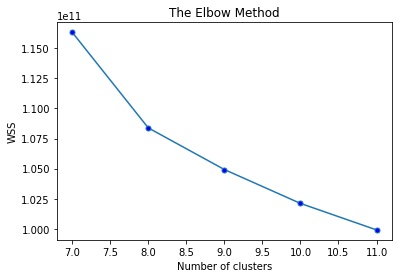

In [59]:
#implement elbow method from scratch
X_sub = Xtrain_org
# K = 
def elbow():
  sse = []
  for k in range(7,12):
    kmeans = MyKmeans(k,'forgy',100,'l2').fit(X_sub)
    centroids = kmeans.centroids
    pred_clusters = kmeans.predict(X_sub)
    curr_sse = 0

    for i in range(len(X_sub)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += np.sum((X_sub[i] - curr_center) ** 2)
      
    sse.append(curr_sse)

  return sse

wss = elbow()
plt.plot(range(7,12), wss, markersize=5, marker='o',markerfacecolor='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

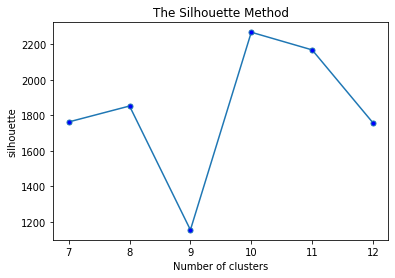

In [60]:
def euclid_distance(test_X, X2):
        all_dists = -2 * np.dot(test_X, X2.T) + np.sum(X2**2, axis=1) + np.sum(test_X**2, axis=1)[:, np.newaxis]
        return all_dists

def silhouette(X):
    Sk_list = []
    for k in range(7,13):
        kmeans = MyKmeans(k,'forgy',100,'l1').fit(X)
        centroids = kmeans.centroids
        # pred_clusters = kmeans.predict(X)
        centroids = kmeans.centroids
        clusters = kmeans.cluster_set
        center_dists = euclid_distance(centroids,centroids)
        # print('center_dists',center_dists.shape)
        tot_S = []
        for c in range(k):
            cur_cdists = euclid_distance(clusters[c],clusters[c])
            # print('cur_cdists',cur_cdists.shape)
            a = np.sum(cur_cdists,axis=1) / (len(clusters[c])-1)
            nearest_center = np.argmin(np.concatenate((center_dists[c,:c],center_dists[c,c+1:])))
            # print('nearest',len(clusters[nearest_center]))
            nearest_cdists = euclid_distance(clusters[c],clusters[nearest_center])
            # print('nearest_cdists',nearest_cdists.shape)
            b = np.sum(nearest_cdists,axis=1) / (len(clusters[nearest_center]))
            s = None
            if len(clusters[nearest_center]) > 1:
                s = (b - a) / np.max(np.stack((a,b),axis=0),axis=0)
            else:
                s = np.array([0])
            # tot_S = s.sum() / len(s)
            tot_S.append(s.sum())
        Sk_list.append(np.mean(tot_S))
    return Sk_list

sil = silhouette(Xtrain_org)
plt.plot(range(7,13), sil, markersize=5, marker='o',markerfacecolor='blue')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

In [66]:
# as per elbow
# forgy
myk1 = MyKmeans(8,'forgy',100,'l2').fit(Xtrain_org)
myres1 = myk1.predict(Xtrain_org)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7]
Train homogenity score:
0.47530874635820897
Test homogenity score:
0.5012491742597607


In [64]:
# As per Silhoutte
# forgy
myk1 = MyKmeans(10,'forgy',100,'l2').fit(Xtrain_org)
myres1 = myk1.predict(Xtrain_org)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.5026772584163831
Test homogenity score:
0.5012491742597607


In [67]:
# as per elbow
# Kmeans++
myk1 = MyKmeans(8,'kmpp',100,'l2').fit(Xtrain_org)
myres1 = myk1.predict(Xtrain_org)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7]
Train homogenity score:
0.49032922544439816
Test homogenity score:
0.5012491742597607


In [68]:
# As per Silhoutte
# Kmeans++
myk1 = MyKmeans(10,'kmpp',100,'l2').fit(Xtrain_org)
myres1 = myk1.predict(Xtrain_org)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_org)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.5210592700248426
Test homogenity score:
0.5012491742597607


In [69]:
# normalizing

# as per elbow
# Kmeans++

Xtrain_norm = Xtrain_org-Xtrain_org.mean()
Xtest_norm = Xtest_org-Xtest_org.mean()

myk1 = MyKmeans(8,'kmpp',100,'l2').fit(Xtrain_norm)
myres1 = myk1.predict(Xtrain_norm)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_norm)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7]
Train homogenity score:
0.49037590936302067
Test homogenity score:
0.29365021566071914


In [70]:
# normalized
# As per Silhoutte
# Kmeans++

myk1 = MyKmeans(10,'kmpp',100,'l2').fit(Xtrain_norm)
myres1 = myk1.predict(Xtrain_norm)
print(myres1.shape,np.unique(myres1))
print("Train homogenity score:")
myscore1 = homogeneity_score(Ytrain_org,myres1)
print(myscore1)
testres1 = myk.predict(Xtest_norm)
print("Test homogenity score:")
mytest1 = homogeneity_score(Ytest_org, testres1)
print(mytest1)

(49000,) [0 1 2 3 4 5 6 7 8 9]
Train homogenity score:
0.5044666384967411
Test homogenity score:
0.29365021566071914
